In [1]:
import copy
import json
import numpy as np
import pandas as pd
import pickle
import warnings
from preprocessing import PreProcessing
from imblearn.over_sampling import SMOTE, RandomOverSampler, BorderlineSMOTE
from imblearn.combine import SMOTEENN
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler

## You'll see the data goes from 0 to 1 on each axis. The coordiante (0,0) is the top left, (1,1) is the bottom right, and (0.5,0.5) is the kick off point.

In [2]:
game_1_pre = PreProcessing()
game_1_data = game_1_pre.load_and_process_data(data_home="data/Sample_Game_1/Sample_Game_1_RawTrackingData_Home_Team.csv", data_away="data/Sample_Game_1/Sample_Game_1_RawTrackingData_Away_Team.csv", 
                                               add_ball_data=False, half_period="both")

In [3]:
game_2_pre = PreProcessing()
game_2_data = game_2_pre.load_and_process_data(data_home="data/Sample_Game_2/Sample_Game_2_RawTrackingData_Home_Team.csv", data_away="data/Sample_Game_2/Sample_Game_2_RawTrackingData_Away_Team.csv", 
                                               add_ball_data=False, half_period="both")

In [4]:
game_1_data

,Period,Frame,Time [s],Home-Player11-x,Home-Player11-y,Home-Player1-x,Home-Player1-y,Home-Player2-x,Home-Player2-y,Home-Player3-x,...,Away-Player20-x,Away-Player20-y,Away-Player21-x,Away-Player21-y,Away-Player22-x,Away-Player22-y,Away-Player23-x,Away-Player23-y,Away-Player24-x,Away-Player24-y
1,1,1,0.04,0.00082,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55960,0.67775,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383
2,1,2,0.08,0.00096,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55960,0.67775,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383
3,1,3,0.12,0.00114,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55960,0.67775,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383
4,1,4,0.16,0.00121,0.48238,0.32622,0.65317,0.33687,0.48988,0.30944,...,0.55974,0.67776,0.55236,0.43313,0.50034,0.94391,0.43644,0.05038,0.37756,0.27473
5,1,5,0.20,0.00129,0.48238,0.32597,0.65269,0.33664,0.49018,0.30948,...,0.55992,0.67791,0.55202,0.43311,0.50017,0.94434,0.43580,0.04977,0.37663,0.27543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145002,2,145002,5800.08,0.90614,0.45355,0.30044,0.68311,0.34157,0.64598,0.31228,...,0.14913,0.56230,0.10317,0.81976,0.19836,0.45137,0.29416,0.48874,0.35600,0.55371
145003,2,145003,5800.12,0.90550,0.45355,0.30044,0.68311,0.34127,0.64583,0.31230,...,0.14937,0.56218,0.10319,0.81960,0.19831,0.45182,0.29373,0.48836,0.35583,0.55283
145004,2,145004,5800.16,0.90492,0.45355,0.30044,0.68311,0.34089,0.64569,0.31214,...,0.14926,0.56204,0.10285,0.81944,0.19805,0.45200,0.29331,0.48800,0.35561,0.55254
145005,2,145005,5800.20,0.90456,0.45356,0.30044,0.68311,0.34056,0.64552,0.31171,...,0.14857,0.56068,0.10231,0.81944,0.19766,0.45237,0.29272,0.48789,0.35532,0.55243


In [5]:
game_2_data

,Period,Frame,Time [s],Home-Player11-x,Home-Player11-y,Home-Player1-x,Home-Player1-y,Home-Player2-x,Home-Player2-y,Home-Player3-x,...,Away-Player20-x,Away-Player20-y,Away-Player21-x,Away-Player21-y,Away-Player22-x,Away-Player22-y,Away-Player23-x,Away-Player23-y,Away-Player24-x,Away-Player24-y
1,1,1,0.04,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234
2,1,2,0.08,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234
3,1,3,0.12,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234
4,1,4,0.16,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234
5,1,5,0.20,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141152,2,141152,5646.08,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,0.25594,0.38425,0.46751,1.05000,0.44966,0.41572,0.26855,0.61845,0.36760,0.12496
141153,2,141153,5646.12,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,0.25594,0.38425,0.46790,1.05000,0.44983,0.41550,0.26855,0.61845,0.36760,0.12496
141154,2,141154,5646.16,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,0.25594,0.38425,0.46818,1.05000,0.44997,0.41485,0.26855,0.61845,0.36760,0.12496
141155,2,141155,5646.20,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,0.25594,0.38425,0.46855,1.05000,0.45017,0.41515,0.26855,0.61845,0.36760,0.12496


## Tracking for individual Players Visualization

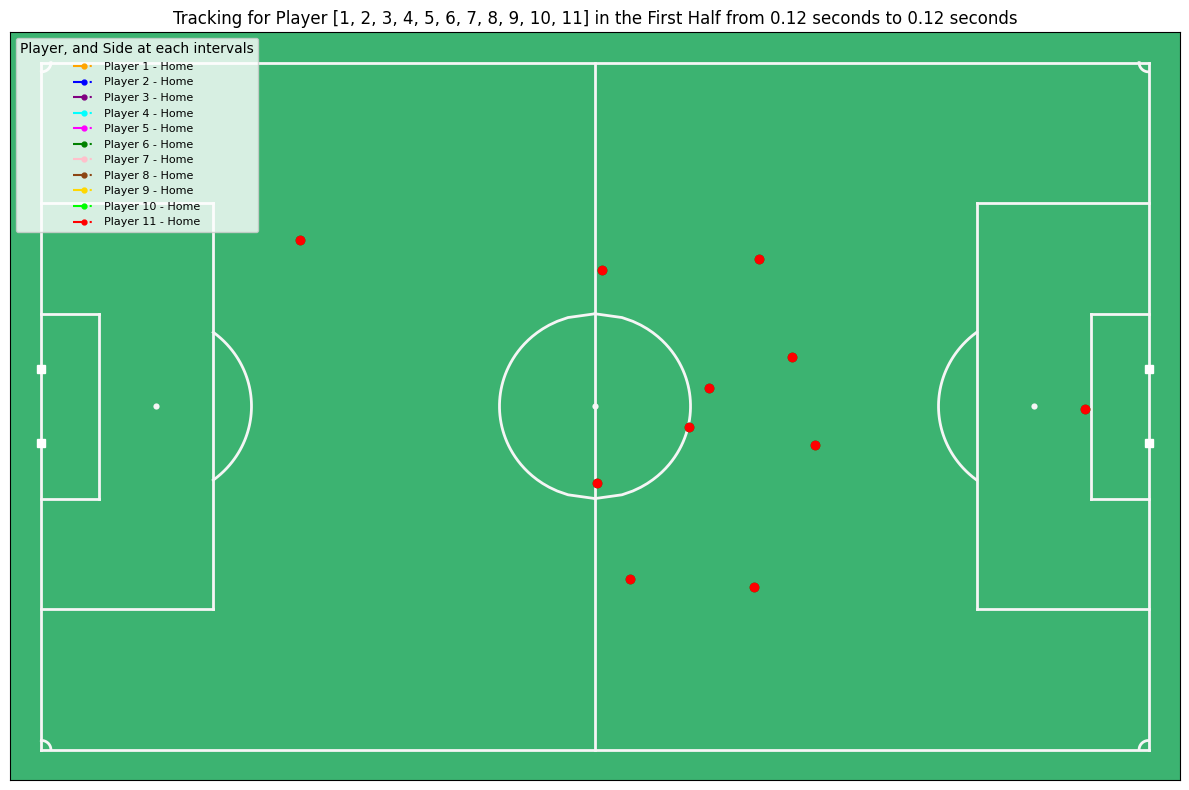

In [6]:
game_2_pre.player_tracking(game_2_data.iloc[2:3], players=[1,2,3,4,5,6,7,8,9,10,11], sides=["Home"]*11, plot_ball=False)

In [7]:
# player_tracking(period_1_data)
# player_tracking(period_1_data_home, [2])
# player_tracking(period_1_data_home, [5])
# player_tracking(period_1_data_home, [8])

# Adding extra features to dataset

In [9]:
vel_acc_game_1_data = game_1_pre.vel_acc(game_1_data)
vel_acc_game_2_data = game_2_pre.vel_acc(game_2_data)

In [10]:
vel_acc_game_1_data

,Period,Frame,Time [s],Home-Player11-x,Home-Player11-y,Home-Player1-x,Home-Player1-y,Home-Player2-x,Home-Player2-y,Home-Player3-x,...,P_20_velocity,P_20_acceleration,P_21_velocity,P_21_acceleration,P_22_velocity,P_22_acceleration,P_23_velocity,P_23_acceleration,P_24_velocity,P_24_acceleration
1,1,1,0.04,0.00082,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,0.08,0.00096,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN
3,1,3,0.12,0.00114,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1,4,0.16,0.00121,0.48238,0.32622,0.65317,0.33687,0.48988,0.30944,...,0.003509,0.087723,0.011138,0.278458,0.019121,0.478033,0.015201,0.380019,0.029611,0.740275
5,1,5,0.20,0.00129,0.48238,0.32597,0.65269,0.33664,0.49018,0.30948,...,0.005858,0.058719,0.008515,-0.065591,0.011560,-0.189042,0.022103,0.172568,0.029100,-0.012774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145002,2,145002,5800.08,0.90614,0.45355,0.30044,0.68311,0.34157,0.64598,0.31228,...,0.008976,-0.100127,0.010198,0.098326,0.002704,0.017604,0.013613,0.028951,0.017509,0.062515
145003,2,145003,5800.12,0.90550,0.45355,0.30044,0.68311,0.34127,0.64583,0.31230,...,0.006708,-0.056686,0.004031,-0.154173,0.011319,0.215377,0.014346,0.018330,0.022407,0.122446
145004,2,145004,5800.16,0.90492,0.45355,0.30044,0.68311,0.34089,0.64569,0.31214,...,0.004451,-0.056427,0.009394,0.134075,0.007906,-0.085338,0.013829,-0.012921,0.009100,-0.332665
145005,2,145005,5800.20,0.90456,0.45356,0.30044,0.68311,0.34056,0.64552,0.31171,...,0.038126,0.841862,0.013500,0.102646,0.013440,0.138350,0.015004,0.029371,0.007754,-0.033653


In [11]:
vel_acc_game_2_data

,Period,Frame,Time [s],Home-Player11-x,Home-Player11-y,Home-Player1-x,Home-Player1-y,Home-Player2-x,Home-Player2-y,Home-Player3-x,...,P_20_velocity,P_20_acceleration,P_21_velocity,P_21_acceleration,P_22_velocity,P_22_acceleration,P_23_velocity,P_23_acceleration,P_24_velocity,P_24_acceleration
1,1,1,0.04,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,0.08,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.0,NaN,0.00000,NaN,0.000000,NaN,0.0,NaN,0.0,NaN
3,1,3,0.12,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,1,4,0.16,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,1,5,0.20,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141152,2,141152,5646.08,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,0.0,0.0,0.00875,0.06250,0.010000,-0.027615,0.0,0.0,0.0,0.0
141153,2,141153,5646.12,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,0.0,0.0,0.00975,0.02500,0.006951,-0.076232,0.0,0.0,0.0,0.0
141154,2,141154,5646.16,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,0.0,0.0,0.00700,-0.06875,0.016623,0.241798,0.0,0.0,0.0,0.0
141155,2,141155,5646.20,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,0.0,0.0,0.00925,0.05625,0.009014,-0.190219,0.0,0.0,0.0,0.0


In [12]:
game_1_ply_tra = vel_acc_game_1_data.iloc[:, 3:]
game_2_ply_tra = vel_acc_game_2_data.iloc[:, 3:]

In [13]:
game_2_ply_tra

,Home-Player11-x,Home-Player11-y,Home-Player1-x,Home-Player1-y,Home-Player2-x,Home-Player2-y,Home-Player3-x,Home-Player3-y,Home-Player4-x,Home-Player4-y,...,P_20_velocity,P_20_acceleration,P_21_velocity,P_21_acceleration,P_22_velocity,P_22_acceleration,P_23_velocity,P_23_acceleration,P_24_velocity,P_24_acceleration
1,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,...,0.0,NaN,0.00000,NaN,0.000000,NaN,0.0,NaN,0.0,NaN
3,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,...,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,...,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,...,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141152,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,0.40837,0.14449,...,0.0,0.0,0.00875,0.06250,0.010000,-0.027615,0.0,0.0,0.0,0.0
141153,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,0.40837,0.14449,...,0.0,0.0,0.00975,0.02500,0.006951,-0.076232,0.0,0.0,0.0,0.0
141154,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,0.40837,0.14449,...,0.0,0.0,0.00700,-0.06875,0.016623,0.241798,0.0,0.0,0.0,0.0
141155,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,0.40837,0.14449,...,0.0,0.0,0.00925,0.05625,0.009014,-0.190219,0.0,0.0,0.0,0.0


In [14]:
# game_1_players, game_1_vel_acc = game_1_ply_tra.loc[:,"Home-P_1-x":"Away-P_24-y"], game_1_ply_tra.loc[:,"P_1_velocity":]
# game_2_players, game_2_vel_acc = game_2_ply_tra.loc[:,"Home-P_1-x":"Away-P_24-y"], game_2_ply_tra.loc[:,"P_1_velocity":]

In [15]:
game_1_player_data = game_1_pre.get_frames(game_1_ply_tra, columns=game_1_ply_tra.columns[0:44:2], frame=1000000, frame_interval=1000000).fillna(0)
game_2_player_data = game_2_pre.get_frames(game_2_ply_tra, columns=game_2_ply_tra.columns[0:44:2], frame=1000000, frame_interval=1000000).fillna(0)

In [16]:
game_2_player_data

,Home-Player11-x,Home-Player11-y,P_11_velocity,P_11_acceleration,Home-Player1-x,Home-Player1-y,P_1_velocity,P_1_acceleration,Home-Player2-x,Home-Player2-y,...,P_22_velocity,P_22_acceleration,Away-Player23-x,Away-Player23-y,P_23_velocity,P_23_acceleration,Away-Player24-x,Away-Player24-y,P_24_velocity,P_24_acceleration
1,0.94275,0.50413,0.0,0.0,0.64812,0.28605,0.0,0.0,0.67752,0.42803,...,0.000000,0.000000,0.50177,0.50145,0.0,0.0,0.49517,0.36234,0.0,0.0
2,0.94275,0.50413,0.0,0.0,0.64812,0.28605,0.0,0.0,0.67752,0.42803,...,0.000000,0.000000,0.50177,0.50145,0.0,0.0,0.49517,0.36234,0.0,0.0
3,0.94275,0.50413,0.0,0.0,0.64812,0.28605,0.0,0.0,0.67752,0.42803,...,0.000000,0.000000,0.50177,0.50145,0.0,0.0,0.49517,0.36234,0.0,0.0
4,0.94275,0.50413,0.0,0.0,0.64812,0.28605,0.0,0.0,0.67752,0.42803,...,0.000000,0.000000,0.50177,0.50145,0.0,0.0,0.49517,0.36234,0.0,0.0
5,0.94275,0.50413,0.0,0.0,0.64812,0.28605,0.0,0.0,0.67752,0.42803,...,0.000000,0.000000,0.50177,0.50145,0.0,0.0,0.49517,0.36234,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141152,0.06285,0.51243,0.0,0.0,0.38499,0.15356,0.0,0.0,0.22558,0.41355,...,0.010000,-0.027615,0.26855,0.61845,0.0,0.0,0.36760,0.12496,0.0,0.0
141153,0.06285,0.51243,0.0,0.0,0.38499,0.15356,0.0,0.0,0.22558,0.41355,...,0.006951,-0.076232,0.26855,0.61845,0.0,0.0,0.36760,0.12496,0.0,0.0
141154,0.06285,0.51243,0.0,0.0,0.38499,0.15356,0.0,0.0,0.22558,0.41355,...,0.016623,0.241798,0.26855,0.61845,0.0,0.0,0.36760,0.12496,0.0,0.0
141155,0.06285,0.51243,0.0,0.0,0.38499,0.15356,0.0,0.0,0.22558,0.41355,...,0.009014,-0.190219,0.26855,0.61845,0.0,0.0,0.36760,0.12496,0.0,0.0


# Classification

In [ ]:
def change_player_name(data: pd.Series) -> pd.Series:
    result = []
    name = ""
    for i in range(len(data)):
        item = data.iloc[i]
        if len(item) == 8:
            if int(item[-2:]) < 12:
                name = f"Home-P_{item[-2:]}"
            else:
                name = f"Away-P_{item[-2:]}"
        else:
            name = f"Home-P_{item[-1:]}"
            
        result.append(name)

    return pd.Series(data=result, name=data.name)

In [17]:
game_1_event_data = pd.read_csv("data/Sample_Game_1/Sample_Game_1_RawEventsData.csv")
game_2_event_data = pd.read_csv("data/Sample_Game_2/Sample_Game_2_RawEventsData.csv")

In [18]:
game_1_event_data

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,Player19,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,0.45,0.39,0.55,0.43
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,0.55,0.43,0.58,0.21
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,0.55,0.19,0.45,0.31
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,0.45,0.32,0.49,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,Home,PASS,NaN,2,143361,5734.44,143483,5739.32,Player12,Player13,0.60,0.33,0.19,0.95
1741,Home,PASS,NaN,2,143578,5743.12,143593,5743.72,Player13,Player4,0.09,0.88,0.14,0.69
1742,Home,BALL LOST,INTERCEPTION,2,143598,5743.92,143618,5744.72,Player4,NaN,0.13,0.69,0.07,0.61
1743,Away,RECOVERY,BLOCKED,2,143617,5744.68,143617,5744.68,Player16,NaN,0.05,0.62,NaN,NaN


In [19]:
game_2_event_data

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,0.54,0.77,0.29,0.24
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,0.31,0.30,NaN,NaN
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,0.32,0.30,NaN,NaN
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,0.34,0.32,NaN,NaN


In [20]:
game_1_event_data = game_1_event_data[["Type", "Start Frame", "End Frame", "From", "To"]]
game_2_event_data = game_2_event_data[["Type", "Start Frame", "End Frame", "From", "To"]]

In [21]:
game_1_event_data.sample(5)

,Type,Start Frame,End Frame,From,To
964,BALL LOST,77581,77625,Player8,NaN
1571,CHALLENGE,128335,128335,Player27,NaN
1199,PASS,98407,98432,Player4,Player8
570,PASS,45835,45904,Player2,Player9
1482,PASS,122240,122272,Player7,Player2


In [22]:
def fix_events(event_dataset):
    fixed_event_df = event_dataset.copy()
    
    start_frames = fixed_event_df["Start Frame"].values
    end_frames = fixed_event_df["End Frame"].values
    
    conflict_indices = np.where(start_frames[1:] == end_frames[:-1])[0] + 1
    
    fixed_event_df.loc[fixed_event_df.index[conflict_indices], "Start Frame"] += 1
    
    return fixed_event_df

In [23]:
game_1_event_data = fix_events(game_1_event_data)
game_2_event_data = fix_events(game_2_event_data)

In [24]:
game_1_event_data

,Type,Start Frame,End Frame,From,To
0,SET PIECE,1,0,Player19,NaN
1,PASS,1,3,Player19,Player21
2,PASS,4,17,Player21,Player15
3,PASS,45,61,Player15,Player19
4,PASS,77,96,Player19,Player21
...,...,...,...,...,...
1740,PASS,143361,143483,Player12,Player13
1741,PASS,143578,143593,Player13,Player4
1742,BALL LOST,143598,143618,Player4,NaN
1743,RECOVERY,143617,143617,Player16,NaN


In [25]:
start_frames = game_1_event_data["Start Frame"].iloc[1:].to_numpy()
end_frames = game_1_event_data["End Frame"].iloc[1:].to_numpy()
event_types = game_1_event_data["Type"].iloc[1:].to_numpy()

assert start_frames.shape == end_frames.shape == event_types.shape

end = game_1_player_data.index[-1]
end_frames = np.minimum(end_frames, end)

frame_ranges = [np.arange(min(i, j), max(i, j) + 1) for i, j in zip(start_frames, end_frames)]
unique_indices  = np.unique(np.concatenate(frame_ranges))
game_1_event = pd.DataFrame(index=unique_indices, columns=["Type"])

for s, e, e_t in zip(start_frames, end_frames, event_types):
    game_1_event.loc[s:e, "Type"] = e_t

game_1_event = game_1_event.fillna("")

In [26]:
start_frames = game_2_event_data["Start Frame"].iloc[1:].to_numpy()
end_frames = game_2_event_data["End Frame"].iloc[1:].to_numpy()
event_types = game_2_event_data["Type"].iloc[1:].to_numpy()

assert start_frames.shape == end_frames.shape == event_types.shape

end = game_2_player_data.index[-1]
end_frames = np.minimum(end_frames, end)

frame_ranges = [np.arange(min(i, j), max(i, j) + 1) for i, j in zip(start_frames, end_frames)]
unique_indices  = np.unique(np.concatenate(frame_ranges))
game_2_event = pd.DataFrame(index=unique_indices, columns=["Type"])

for s, e, e_t in zip(start_frames, end_frames, event_types):
    game_2_event.loc[s:e, "Type"] = e_t

game_2_event = game_2_event.fillna("")

In [27]:
game_1_event

,Type
1,PASS
2,PASS
3,PASS
4,PASS
5,PASS
...,...
143626,BALL OUT
143627,BALL OUT
143628,BALL OUT
143629,BALL OUT


In [28]:
game_2_event

,Type
52,PASS
53,PASS
54,PASS
55,PASS
56,PASS
...,...
140294,BALL OUT
140295,BALL OUT
140296,BALL OUT
140297,BALL OUT


In [29]:
valid_indices = game_1_event.index.intersection(game_1_player_data.index)
X_1 = game_1_player_data.loc[valid_indices]
y_1 = game_1_event.loc[valid_indices, "Type"]

In [30]:
valid_indices = game_2_event.index.intersection(game_2_player_data.index)
X_2 = game_2_player_data.loc[valid_indices]
y_2 = game_2_event.loc[valid_indices, "Type"]

In [ ]:
X_1 = game_1_pre.expand_dataset(dataset=X_1, look_back=50)
X_2 = game_2_pre.expand_dataset(dataset=X_2, look_back=50)

y_1 = game_1_pre.expand_dataset(dataset=y_1, look_back=50)
y_2 = game_2_pre.expand_dataset(dataset=y_2, look_back=50)

In [ ]:
def create_segments_multifeature(data, label, segment_length):
    inputs = []
    outputs = []
    
    assert len(data) == len(label), "Data and label lengths must match"
    
    for i in range(0, len(data) - segment_length + 1, segment_length):
        input_segment = data.iloc[i:i + segment_length].values
        label_segment = label.iloc[i:i + segment_length].values
        
        if len(input_segment) == segment_length:
            inputs.append(input_segment)
            outputs.append(label_segment)
            
    return np.array(inputs), np.array(outputs)

In [ ]:
X_1, y_1 = create_segments_multifeature(X_1, y_1, segment_length=1000)
X_2, y_2 = create_segments_multifeature(X_2, y_2, segment_length=1000)

In [ ]:
X = pd.concat([X_1, X_2])
y = np.concatenate((y_1, y_2))

assert X.shape[0] == y.shape[0]

In [ ]:
X_1.shape, y_1.shape

In [ ]:
sme = SMOTEENN()
X_res, y_res = sme.fit_resample(X, y)

In [ ]:
splits = {"X_train": [], "X_test": [], "y_train": [], "y_test": []}
scaled = {"X_train": [], "X_test": [], "y_train": [], "y_test": []}

for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    splits["X_train"].append(X_train)
    splits["X_test"].append(X_test)
    splits["y_train"].append(y_train)
    splits["y_test"].append(y_test)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # sme = SMOTE(n_jobs=-2, k_neighbors=1)
    # X_train_res, y_train_res = sme.fit_resample(X_train_scaled, y_train)
    
    scaled["X_train"].append(X_train_scaled)
    scaled["X_test"].append(X_test_scaled)
    scaled["y_train"].append(y_train)
    scaled["y_test"].append(y_test)


In [ ]:
[i.shape for i in splits["X_train"]]

In [ ]:
for k, v in scaled.items():
    for i in v:
        print(k, i.shape)

In [ ]:
# for k, v in scaled.items():
#     for i in v:
#         if k.startswith("y"):
#             print(k, i.shape)
#             print(np.unique(i, return_counts=True), "\n\n")


In [ ]:
# vectorizer = CountVectorizer()
# vectorizer.fit(y_train.ravel())
# y_train = vectorizer.transform(y_train.ravel())
# y_test = vectorizer.transform(y_test.ravel())
# y_train = y_train.toarray()
# y_test = y_test.toarray()

In [ ]:
# y_res.shape

In [ ]:
y_test.shape

In [ ]:
np.unique(y, return_counts=True)

In [ ]:
# np.unique(y_res, return_counts=True)

In [ ]:
np.unique(y_test, return_counts=True)

In [ ]:
np.unique(y, return_counts=True)

In [ ]:
np.unique(y_train, return_counts=True)

In [ ]:
np.unique(y_test, return_counts=True)

In [ ]:
warnings.filterwarnings("always")

In [ ]:
def conf_matrix(y_train, y_train_pred, y_test, y_pred, labels, split, model_name=""):
    fig, ax = plt.subplots(figsize=(12, 10))
    
    cm_counts = confusion_matrix(y_test, y_pred, labels=labels)
    cm_normalized = confusion_matrix(y_test, y_pred, labels=labels, normalize="true")

    annot = []
    for i in range(len(cm_counts)):
        row_annot = []
        for j in range(len(cm_counts[i])):
            row_annot.append(f"{cm_counts[i, j]} | {cm_normalized[i, j]:.2f}")
        annot.append(row_annot)
    
    sns.heatmap(cm_normalized, 
                annot=annot,
                fmt="", 
                cmap="viridis", 
                xticklabels=labels, 
                yticklabels=labels,
                cbar_kws={"label": "Normalized Frequency"})

    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    ax.set_title(f"{model_name.title()} Confusion Matrix Split #{(split+1)}")
    plt.tight_layout()
    plt.show()
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_pred)

    print(f"Split #{(split+1)} {model_name} training accuracy: {train_accuracy * 100:0.2f}%")
    print(f"Split #{(split+1)} {model_name} testing accuracy: {test_accuracy * 100:0.2f}%\n")   

In [31]:
models = {
      # "AdaBoost classifier": AdaBoostClassifier(random_state=42), 
      # "Logistic regression": LogisticRegression(solver="saga", random_state=42),
      # "Gaussian naive bayes": GaussianNB(),
      "Random forest classifier": RandomForestClassifier(n_jobs=-1, random_state=42), 
      # "Neural network": MLPClassifier(random_state=42), 
    }

(41974, 88)

In [33]:
# for i in range(len(scaled["X_train"])):
for name, model in models.items():
    # X_train_scaled = scaled["X_train"][0]
    # X_test_scaled = scaled["X_test"][0]
    # y_train = scaled["y_train"][0]
    # y_test = scaled["y_test"][0]

    model.fit(X_1, y_1)
    
    y_pred = model.predict(X_2)

    print(accuracy_score(y_2, y_pred))
    
    # labels = np.unique(y_test)
    
    # conf_matrix(y_train=y_train, y_train_pred=y_train_pred, y_test=y_test, y_pred=y_pred, labels=labels, split=i, model_name=name)
    
    # print("\n")

0.7399705218552808


In [ ]:
y_1.shape

In [ ]:
with open("model.pickle", "wb") as f:
    pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
y_pred = model.predict(X_2)

In [ ]:
accuracy_score(y_2, y_pred)

# New Dataset

In [ ]:
new_data = pd.read_csv("data/Sample_Game_3/Sample_Game_3_tracking.txt", sep=r"[;,:]", header=None, engine="python")
new_data.index =  range(1, len(new_data) + 1)

In [ ]:
time = np.arange(0.04, (len(new_data) + 1) * 0.04, 0.04).round(2)
new_data.insert(1, "Time [s]", time)

In [ ]:
columns = ['Frame', 'Time [s]', 'Home-Player11-x', 'Home-Player11-y', 'Home-Player1-x', 'Home-Player1-y', 'Home-Player2-x', 'Home-Player2-y',
       'Home-Player3-x', 'Home-Player3-y', 'Home-Player4-x', 'Home-Player4-y', 'Home-Player5-x', 'Home-Player5-y', 'Home-Player6-x', 'Home-Player6-y',
       'Home-Player7-x', 'Home-Player7-y', 'Home-Player8-x', 'Home-Player8-y', 'Home-Player9-x', 'Home-Player9-y', 'Home-Player10-x',
       'Home-Player10-y', 'Away-Player25-x', 'Away-Player25-y', 'Away-Player15-x', 'Away-Player15-y', 'Away-Player16-x',
       'Away-Player16-y', 'Away-Player17-x', 'Away-Player17-y', 'Away-Player18-x', 'Away-Player18-y', 'Away-Player19-x',
       'Away-Player19-y', 'Away-Player20-x', 'Away-Player20-y', 'Away-Player21-x', 'Away-Player21-y', 'Away-Player22-x',
       'Away-Player22-y', 'Away-Player23-x', 'Away-Player23-y', 'Away-Player24-x', 'Away-Player24-y', "Ball-x", "Ball-y"]
new_data.columns = columns

In [ ]:
new_data

In [ ]:
vel_dir_new_data = game_1_pre.vel_dir(new_data)
vel_dir_new_data

In [ ]:
new_data_ply_tra = vel_dir_new_data.iloc[:, 2:]
new_data_ply_tra

In [ ]:
new_data_player_data = game_1_pre.get_frames(new_data_ply_tra, columns=game_1_ply_tra.columns[0:44:2], frame=1000000, frame_interval=1000000).fillna(0)
new_data_player_data

In [ ]:
with open("data/Sample_Game_3/Sample_Game_3_events.json", "r") as f:
    data = json.load(f)

In [ ]:
type_ = np.array([])
start_frame = np.array([])
end_frame = np.array([])

for i in data["data"]:
    t = i["type"]["name"]
    sf = i["start"]["frame"]
    ef = i["end"]["frame"]

    if t != "CARRY":   
        type_ = np.append(type_, t)
        start_frame = np.append(start_frame, sf)
        end_frame = np.append(end_frame, ef)


new_data_event_data = pd.DataFrame({"Type": type_, "Start Frame": start_frame.astype(np.int64), "End Frame": end_frame.astype(np.int64)})

In [ ]:
new_data_event_data = fix_events(new_data_event_data)

In [ ]:
new_data_event_data.head(5)

In [ ]:
start_frames = new_data_event_data["Start Frame"].iloc[1:].to_numpy()
end_frames = new_data_event_data["End Frame"].iloc[1:].to_numpy()
event_types = new_data_event_data["Type"].iloc[1:].to_numpy()

assert start_frames.shape == end_frames.shape == event_types.shape

end = new_data_player_data.index[-1]
end_frames = np.minimum(end_frames, end)

frame_ranges = [np.arange(min(i, j), max(i, j) + 1) for i, j in zip(start_frames, end_frames)]
unique_indices  = np.unique(np.concatenate(frame_ranges))
new_data_event = pd.DataFrame(index=unique_indices, columns=["Type"])

for s, e, e_t in zip(start_frames, end_frames, event_types):
    new_data_event.loc[s:e, "Type"] = e_t

new_data_event = new_data_event.fillna("")

In [ ]:
new_data_event

In [ ]:
# with open("model.pickle", "rb") as f:
#     loaded_model = pickle.load(f)

In [ ]:
valid_indices = new_data_event.index.intersection(new_data_player_data.index)
X_new = new_data_player_data.loc[valid_indices]
y_new = new_data_event.loc[valid_indices, "Type"]

In [ ]:
X_new.shape

In [ ]:
y_new.shape

In [ ]:
assert X_new.shape[0] == y_new.shape[0]

In [ ]:
y_new_pred = model.predict(X_new.values)
train_accuracy = accuracy_score(y_new, y_new_pred)

print(f"Training accuracy: {train_accuracy * 100:0.2f}%")